In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/udemy_time_series/energydata_complete.csv")
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [3]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [4]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
df.isna().any()

date           False
Appliances     False
lights         False
T1             False
RH_1           False
T2             False
RH_2           False
T3             False
RH_3           False
T4             False
RH_4           False
T5             False
RH_5           False
T6             False
RH_6           False
T7             False
RH_7           False
T8             False
RH_8           False
T9             False
RH_9           False
T_out          False
Press_mm_hg    False
RH_out         False
Windspeed      False
Visibility     False
Tdewpoint      False
rv1            False
rv2            False
dtype: bool

In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
df.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

In [8]:
df = df.set_index("date").resample('H').mean()
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,...,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044
2016-01-11 18:00:00,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,...,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206
2016-01-11 19:00:00,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,...,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932
2016-01-11 20:00:00,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,...,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642
2016-01-11 21:00:00,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,...,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,101.666667,1.666667,25.544444,46.638889,26.421369,41.205054,28.397778,41.160000,24.666667,45.883889,...,23.100000,46.594444,21.916667,755.800000,59.000000,2.000000,21.583333,13.475000,27.553946,27.553946
2016-05-27 15:00:00,76.666667,0.000000,25.500000,45.677639,26.154762,41.041238,28.240000,40.306667,24.694444,45.270000,...,23.138889,46.590000,22.216667,755.675000,57.333333,2.000000,21.833333,13.258333,25.429025,25.429025
2016-05-27 16:00:00,135.000000,0.000000,25.487778,46.250000,26.000000,41.736190,27.953333,40.607778,24.700000,45.476667,...,23.193333,46.645381,22.883333,755.375000,55.000000,2.416667,22.583333,13.283333,23.229344,23.229344


## グラフを作ってデータをチェック
- Appliances
- T_out
- RH_out
- Windspeed
- Press_mm_hg


<Axes: xlabel='date'>

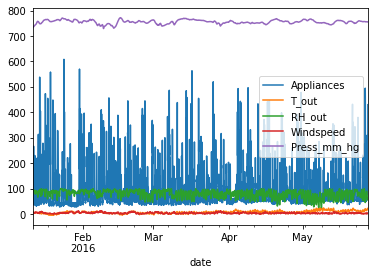

In [10]:
cols = ["Appliances", "T_out", "RH_out", "Windspeed", "Press_mm_hg"]
df[cols].plot()

<Axes: >

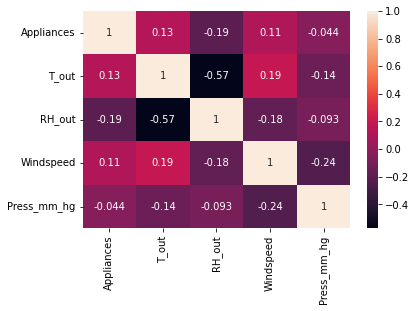

In [12]:
sns.heatmap(df[cols].corr(), annot=True)

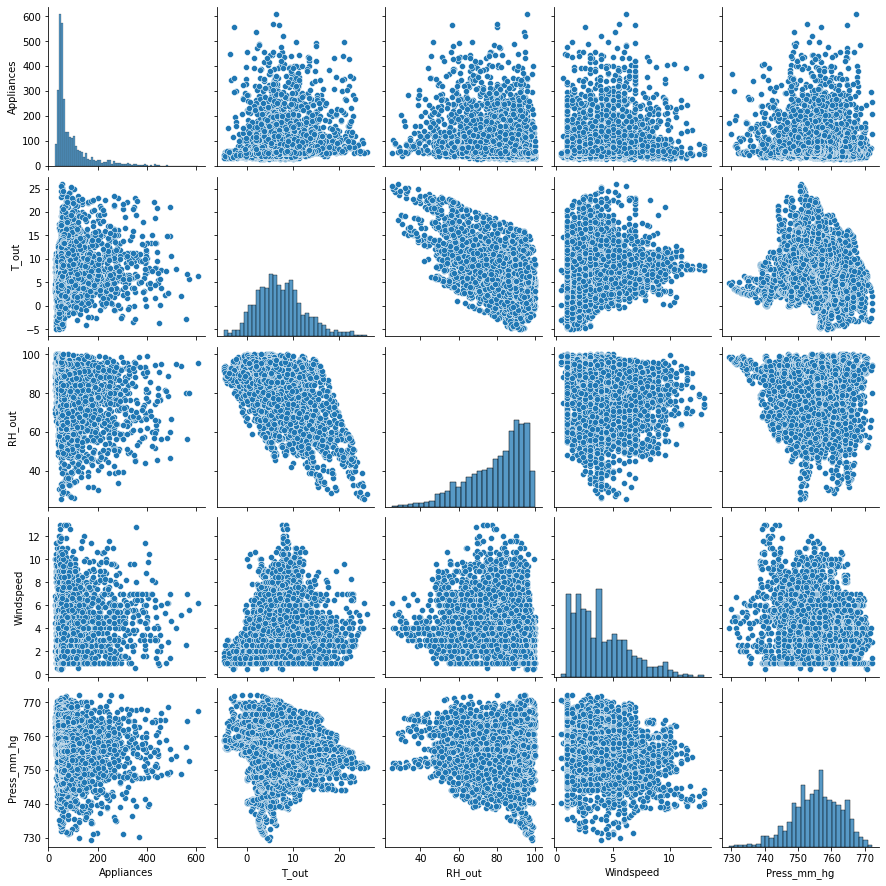

In [13]:
sns.pairplot(df[cols])

<Axes: xlabel='date'>

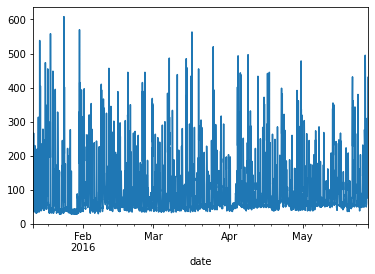

In [14]:
df["Appliances"].plot()

<Axes: xlabel='date'>

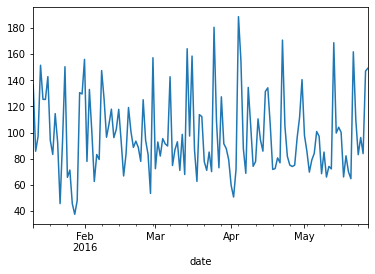

In [15]:
df.resample('D').mean()["Appliances"].plot()

## 目的変数・説明変数の作成
- 3日後の同時刻の使用量を予測したいので、それを目的変数（y）とする
- 説明変数には、AppliancesとRH_outのラグ変数を使用する
- ラグ変数は全て使うと多くて今回は見づらそうなので、相関が高いもののみ使う（本来は自己相関関数を調べたほうがよい）


In [16]:
df["y"] = df["Appliances"].shift(-72)

In [17]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,y
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,...,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044,405.000000
2016-01-11 18:00:00,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,...,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206,216.666667
2016-01-11 19:00:00,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,...,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932,231.666667
2016-01-11 20:00:00,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,...,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642,110.000000
2016-01-11 21:00:00,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,...,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274,116.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,101.666667,1.666667,25.544444,46.638889,26.421369,41.205054,28.397778,41.160000,24.666667,45.883889,...,46.594444,21.916667,755.800000,59.000000,2.000000,21.583333,13.475000,27.553946,27.553946,NaN
2016-05-27 15:00:00,76.666667,0.000000,25.500000,45.677639,26.154762,41.041238,28.240000,40.306667,24.694444,45.270000,...,46.590000,22.216667,755.675000,57.333333,2.000000,21.833333,13.258333,25.429025,25.429025,NaN
2016-05-27 16:00:00,135.000000,0.000000,25.487778,46.250000,26.000000,41.736190,27.953333,40.607778,24.700000,45.476667,...,46.645381,22.883333,755.375000,55.000000,2.416667,22.583333,13.283333,23.229344,23.229344,NaN


In [18]:
df_app = df[["Appliances", "RH_out", "y"]].reset_index()
df_app["date_y"] = df_app["date"].shift(-72)
df_app

,date,Appliances,RH_out,y,date_y
0,2016-01-11 17:00:00,55.000000,92.000000,405.000000,2016-01-14 17:00:00
1,2016-01-11 18:00:00,176.666667,91.583333,216.666667,2016-01-14 18:00:00
2,2016-01-11 19:00:00,173.333333,89.750000,231.666667,2016-01-14 19:00:00
3,2016-01-11 20:00:00,125.000000,87.583333,110.000000,2016-01-14 20:00:00
4,2016-01-11 21:00:00,103.333333,87.416667,116.666667,2016-01-14 21:00:00
...,...,...,...,...,...
3285,2016-05-27 14:00:00,101.666667,59.000000,NaN,NaT
3286,2016-05-27 15:00:00,76.666667,57.333333,NaN,NaT
3287,2016-05-27 16:00:00,135.000000,55.000000,NaN,NaT
3288,2016-05-27 17:00:00,180.000000,55.833333,NaN,NaT


In [19]:
for i in range(24*7):
  df_app["Appliances_lag" + str(i+1)] = df_app["Appliances"].shift(i+1)
  df_app["RH_out_lag" + str(i+1)] = df_app["RH_out"].shift(i+1)

<ipython-input-19-fdd3e2578435>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_app["RH_out_lag" + str(i+1)] = df_app["RH_out"].shift(i+1)
<ipython-input-19-fdd3e2578435>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_app["Appliances_lag" + str(i+1)] = df_app["Appliances"].shift(i+1)
<ipython-input-19-fdd3e2578435>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

In [20]:
df_app

,date,Appliances,RH_out,y,date_y,Appliances_lag1,RH_out_lag1,Appliances_lag2,RH_out_lag2,Appliances_lag3,...,Appliances_lag164,RH_out_lag164,Appliances_lag165,RH_out_lag165,Appliances_lag166,RH_out_lag166,Appliances_lag167,RH_out_lag167,Appliances_lag168,RH_out_lag168
0,2016-01-11 17:00:00,55.000000,92.000000,405.000000,2016-01-14 17:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-11 18:00:00,176.666667,91.583333,216.666667,2016-01-14 18:00:00,55.000000,92.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-11 19:00:00,173.333333,89.750000,231.666667,2016-01-14 19:00:00,176.666667,91.583333,55.000000,92.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-11 20:00:00,125.000000,87.583333,110.000000,2016-01-14 20:00:00,173.333333,89.750000,176.666667,91.583333,55.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-11 21:00:00,103.333333,87.416667,116.666667,2016-01-14 21:00:00,125.000000,87.583333,173.333333,89.750000,176.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,2016-05-27 14:00:00,101.666667,59.000000,NaN,NaT,265.000000,59.583333,185.000000,64.083333,310.000000,...,78.333333,58.166667,75.000000,64.250000,48.333333,73.250000,46.666667,81.083333,60.000000,85.750000
3286,2016-05-27 15:00:00,76.666667,57.333333,NaN,NaT,101.666667,59.000000,265.000000,59.583333,185.000000,...,65.000000,56.583333,78.333333,58.166667,75.000000,64.250000,48.333333,73.250000,46.666667,81.083333
3287,2016-05-27 16:00:00,135.000000,55.000000,NaN,NaT,76.666667,57.333333,101.666667,59.000000,265.000000,...,70.000000,61.416667,65.000000,56.583333,78.333333,58.166667,75.000000,64.250000,48.333333,73.250000
3288,2016-05-27 17:00:00,180.000000,55.833333,NaN,NaT,135.000000,55.000000,76.666667,57.333333,101.666667,...,65.000000,75.250000,70.000000,61.416667,65.000000,56.583333,78.333333,58.166667,75.000000,64.250000


In [21]:
df_app_corr = df_app.corr()
df_app_corr["y"]

Appliances           0.222274
RH_out              -0.164231
y                    1.000000
Appliances_lag1      0.181970
RH_out_lag1         -0.144299
                       ...   
RH_out_lag166       -0.187809
Appliances_lag167    0.213370
RH_out_lag167       -0.195893
Appliances_lag168    0.254525
RH_out_lag168       -0.190660
Name: y, Length: 339, dtype: float64

In [23]:
df_app_corr["y"].sort_values(ascending=False).head(12)

y                    1.000000
Appliances_lag96     0.328234
Appliances_lag97     0.277832
Appliances_lag95     0.273383
RH_out_lag35         0.273247
RH_out_lag11         0.268422
RH_out_lag12         0.263108
RH_out_lag36         0.259974
RH_out_lag34         0.259857
Appliances_lag120    0.255216
RH_out_lag155        0.254757
Appliances_lag168    0.254525
Name: y, dtype: float64

In [24]:
df_app_corr["y"].sort_values(ascending=False).tail(12)

RH_out_lag97    -0.206879
RH_out_lag70    -0.207783
RH_out_lag48    -0.209207
RH_out_lag71    -0.211247
RH_out_lag47    -0.211309
RH_out_lag119   -0.212255
RH_out_lag142   -0.215840
RH_out_lag144   -0.218745
RH_out_lag94    -0.220671
RH_out_lag96    -0.224349
RH_out_lag143   -0.225679
RH_out_lag95    -0.230581
Name: y, dtype: float64

In [26]:
high_corr_lags = df_app_corr["y"].sort_values(ascending=False).head(11)[1:].index.tolist()
high_corr_lags

['Appliances_lag96',
 'Appliances_lag97',
 'Appliances_lag95',
 'RH_out_lag35',
 'RH_out_lag11',
 'RH_out_lag12',
 'RH_out_lag36',
 'RH_out_lag34',
 'Appliances_lag120',
 'RH_out_lag155']

In [27]:
df_concat = pd.concat([df["y"].reset_index(), df_app[high_corr_lags + ["date", "date_y"]]], axis=1)

In [28]:
df_concat

,date,y,Appliances_lag96,Appliances_lag97,Appliances_lag95,RH_out_lag35,RH_out_lag11,RH_out_lag12,RH_out_lag36,RH_out_lag34,Appliances_lag120,RH_out_lag155,date,date_y
0,2016-01-11 17:00:00,405.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-11 17:00:00,2016-01-14 17:00:00
1,2016-01-11 18:00:00,216.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-11 18:00:00,2016-01-14 18:00:00
2,2016-01-11 19:00:00,231.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-11 19:00:00,2016-01-14 19:00:00
3,2016-01-11 20:00:00,110.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-11 20:00:00,2016-01-14 20:00:00
4,2016-01-11 21:00:00,116.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-11 21:00:00,2016-01-14 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,2016-05-27 14:00:00,NaN,58.333333,56.666667,73.333333,95.000000,84.083333,81.416667,95.000000,96.250000,106.666667,91.416667,2016-05-27 14:00:00,NaT
3286,2016-05-27 15:00:00,NaN,73.333333,58.333333,156.666667,96.250000,88.250000,84.083333,95.000000,98.833333,96.666667,92.833333,2016-05-27 15:00:00,NaT
3287,2016-05-27 16:00:00,NaN,156.666667,73.333333,380.000000,98.833333,89.583333,88.250000,96.250000,100.000000,88.333333,94.000000,2016-05-27 16:00:00,NaT
3288,2016-05-27 17:00:00,NaN,380.000000,156.666667,123.333333,100.000000,89.000000,89.583333,98.833333,99.791667,265.000000,94.000000,2016-05-27 17:00:00,NaT


## 機械学習用　訓練データ・テストデータの作成

In [29]:
df_concat = df_concat.dropna()

In [30]:
df_concat

,date,y,Appliances_lag96,Appliances_lag97,Appliances_lag95,RH_out_lag35,RH_out_lag11,RH_out_lag12,RH_out_lag36,RH_out_lag34,Appliances_lag120,RH_out_lag155,date,date_y
155,2016-01-18 04:00:00,40.000000,35.000000,45.000000,45.000000,83.833333,77.166667,65.416667,78.083333,81.750000,45.000000,92.000000,2016-01-18 04:00:00,2016-01-21 04:00:00
156,2016-01-18 05:00:00,51.666667,45.000000,35.000000,40.000000,81.750000,81.333333,77.166667,83.833333,89.083333,41.666667,91.583333,2016-01-18 05:00:00,2016-01-21 05:00:00
157,2016-01-18 06:00:00,45.000000,40.000000,45.000000,226.666667,89.083333,76.500000,81.333333,81.750000,93.666667,66.666667,89.750000,2016-01-18 06:00:00,2016-01-21 06:00:00
158,2016-01-18 07:00:00,46.666667,226.666667,40.000000,160.000000,93.666667,75.916667,76.500000,89.083333,96.833333,63.333333,87.583333,2016-01-18 07:00:00,2016-01-21 07:00:00
159,2016-01-18 08:00:00,31.666667,160.000000,226.666667,168.333333,96.833333,80.833333,75.916667,93.666667,95.916667,208.333333,87.416667,2016-01-18 08:00:00,2016-01-21 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,2016-05-24 14:00:00,101.666667,60.000000,61.666667,46.666667,94.416667,86.000000,86.000000,95.166667,95.000000,63.333333,90.250000,2016-05-24 14:00:00,2016-05-27 14:00:00
3214,2016-05-24 15:00:00,76.666667,46.666667,60.000000,48.333333,95.000000,85.166667,86.000000,94.416667,95.000000,81.666667,90.750000,2016-05-24 15:00:00,2016-05-27 15:00:00
3215,2016-05-24 16:00:00,135.000000,48.333333,46.666667,75.000000,95.000000,84.416667,85.166667,95.000000,95.416667,90.000000,88.583333,2016-05-24 16:00:00,2016-05-27 16:00:00
3216,2016-05-24 17:00:00,180.000000,75.000000,48.333333,78.333333,95.416667,84.166667,84.416667,95.000000,96.000000,208.333333,86.333333,2016-05-24 17:00:00,2016-05-27 17:00:00


In [31]:
df_concat = df_concat.set_index("date_y")
df_concat

,date,y,Appliances_lag96,Appliances_lag97,Appliances_lag95,RH_out_lag35,RH_out_lag11,RH_out_lag12,RH_out_lag36,RH_out_lag34,Appliances_lag120,RH_out_lag155,date
date_y,,,,,,,,,,,,,
2016-01-21 04:00:00,2016-01-18 04:00:00,40.000000,35.000000,45.000000,45.000000,83.833333,77.166667,65.416667,78.083333,81.750000,45.000000,92.000000,2016-01-18 04:00:00
2016-01-21 05:00:00,2016-01-18 05:00:00,51.666667,45.000000,35.000000,40.000000,81.750000,81.333333,77.166667,83.833333,89.083333,41.666667,91.583333,2016-01-18 05:00:00
2016-01-21 06:00:00,2016-01-18 06:00:00,45.000000,40.000000,45.000000,226.666667,89.083333,76.500000,81.333333,81.750000,93.666667,66.666667,89.750000,2016-01-18 06:00:00
2016-01-21 07:00:00,2016-01-18 07:00:00,46.666667,226.666667,40.000000,160.000000,93.666667,75.916667,76.500000,89.083333,96.833333,63.333333,87.583333,2016-01-18 07:00:00
2016-01-21 08:00:00,2016-01-18 08:00:00,31.666667,160.000000,226.666667,168.333333,96.833333,80.833333,75.916667,93.666667,95.916667,208.333333,87.416667,2016-01-18 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,2016-05-24 14:00:00,101.666667,60.000000,61.666667,46.666667,94.416667,86.000000,86.000000,95.166667,95.000000,63.333333,90.250000,2016-05-24 14:00:00
2016-05-27 15:00:00,2016-05-24 15:00:00,76.666667,46.666667,60.000000,48.333333,95.000000,85.166667,86.000000,94.416667,95.000000,81.666667,90.750000,2016-05-24 15:00:00
2016-05-27 16:00:00,2016-05-24 16:00:00,135.000000,48.333333,46.666667,75.000000,95.000000,84.416667,85.166667,95.000000,95.416667,90.000000,88.583333,2016-05-24 16:00:00


In [32]:
train_df = df_concat.loc[:"2016-04-30"]
test_df = df_concat.loc["2016-05-01":]

In [33]:
train_df

,date,y,Appliances_lag96,Appliances_lag97,Appliances_lag95,RH_out_lag35,RH_out_lag11,RH_out_lag12,RH_out_lag36,RH_out_lag34,Appliances_lag120,RH_out_lag155,date
date_y,,,,,,,,,,,,,
2016-01-21 04:00:00,2016-01-18 04:00:00,40.000000,35.000000,45.000000,45.000000,83.833333,77.166667,65.416667,78.083333,81.750000,45.000000,92.000000,2016-01-18 04:00:00
2016-01-21 05:00:00,2016-01-18 05:00:00,51.666667,45.000000,35.000000,40.000000,81.750000,81.333333,77.166667,83.833333,89.083333,41.666667,91.583333,2016-01-18 05:00:00
2016-01-21 06:00:00,2016-01-18 06:00:00,45.000000,40.000000,45.000000,226.666667,89.083333,76.500000,81.333333,81.750000,93.666667,66.666667,89.750000,2016-01-18 06:00:00
2016-01-21 07:00:00,2016-01-18 07:00:00,46.666667,226.666667,40.000000,160.000000,93.666667,75.916667,76.500000,89.083333,96.833333,63.333333,87.583333,2016-01-18 07:00:00
2016-01-21 08:00:00,2016-01-18 08:00:00,31.666667,160.000000,226.666667,168.333333,96.833333,80.833333,75.916667,93.666667,95.916667,208.333333,87.416667,2016-01-18 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-30 19:00:00,2016-04-27 19:00:00,60.000000,116.666667,275.000000,115.000000,83.250000,94.166667,95.583333,88.750000,76.750000,105.000000,75.250000,2016-04-27 19:00:00
2016-04-30 20:00:00,2016-04-27 20:00:00,71.666667,115.000000,116.666667,78.333333,76.750000,92.166667,94.166667,83.250000,75.208333,105.000000,68.750000,2016-04-27 20:00:00
2016-04-30 21:00:00,2016-04-27 21:00:00,70.000000,78.333333,115.000000,63.333333,75.208333,86.000000,92.166667,76.750000,75.708333,71.666667,62.833333,2016-04-27 21:00:00


In [34]:
test_df

,date,y,Appliances_lag96,Appliances_lag97,Appliances_lag95,RH_out_lag35,RH_out_lag11,RH_out_lag12,RH_out_lag36,RH_out_lag34,Appliances_lag120,RH_out_lag155,date
date_y,,,,,,,,,,,,,
2016-05-01 00:00:00,2016-04-28 00:00:00,51.666667,55.000000,60.000000,55.000000,80.583333,70.916667,75.333333,78.083333,80.833333,56.666667,42.333333,2016-04-28 00:00:00
2016-05-01 01:00:00,2016-04-28 01:00:00,55.000000,55.000000,55.000000,50.000000,80.833333,67.583333,70.916667,80.583333,78.666667,50.000000,40.000000,2016-04-28 01:00:00
2016-05-01 02:00:00,2016-04-28 02:00:00,48.333333,50.000000,55.000000,55.000000,78.666667,64.916667,67.583333,80.833333,74.416667,56.666667,38.333333,2016-04-28 02:00:00
2016-05-01 03:00:00,2016-04-28 03:00:00,41.666667,55.000000,50.000000,60.000000,74.416667,64.083333,64.916667,78.666667,67.083333,51.666667,36.416667,2016-04-28 03:00:00
2016-05-01 04:00:00,2016-04-28 04:00:00,53.333333,60.000000,55.000000,53.333333,67.083333,65.333333,64.083333,74.416667,57.666667,55.000000,40.333333,2016-04-28 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,2016-05-24 14:00:00,101.666667,60.000000,61.666667,46.666667,94.416667,86.000000,86.000000,95.166667,95.000000,63.333333,90.250000,2016-05-24 14:00:00
2016-05-27 15:00:00,2016-05-24 15:00:00,76.666667,46.666667,60.000000,48.333333,95.000000,85.166667,86.000000,94.416667,95.000000,81.666667,90.750000,2016-05-24 15:00:00
2016-05-27 16:00:00,2016-05-24 16:00:00,135.000000,48.333333,46.666667,75.000000,95.000000,84.416667,85.166667,95.000000,95.416667,90.000000,88.583333,2016-05-24 16:00:00


In [37]:
train_df.drop(columns=["date"]).to_csv("/content/drive/MyDrive/udemy_time_series/train.csv", index=True)
test_df.drop(columns=["date"]).to_csv("/content/drive/MyDrive/udemy_time_series/test.csv", index=True)